Load the data set

In [1]:
%run datasetup.py


	Data Set Information:

	This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). 
	Notes: 
	1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. 
	2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


	Attribute Information:

	1.date: Date in format dd/mm/yyyy 
	2.time: time in format hh:mm:ss 
	3.global_active_power: household global minute-averaged active power (in kilowatt) 
	4.global

import statements

In [2]:
import pandas as pd
%matplotlib notebook
import zipfile

Let's inspect the zipfile

In [3]:
fname = 'data/household_power_consumption.zip'
with zipfile.ZipFile(fname, mode = 'r') as fpzip:
    print(fpzip.infolist())
    print(fpzip.namelist())
    with fpzip.open(fpzip.namelist()[0],'r') as fp:
        counter = 0
        for line in fp:
            print(line)
            counter += 1
            if counter == 5:
                break

[<ZipInfo filename='household_power_consumption.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=132960755 compress_size=20640722>]
['household_power_consumption.txt']
b'Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3\r\n'
b'16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000\r\n'
b'16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000\r\n'
b'16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000\r\n'
b'16/12/2006;17:27:00;5.388;0.502;233.740;23.000;0.000;1.000;17.000\r\n'


There is only one file in the zip archive so Let's try to read it with pandas

In [4]:
df = pd.read_csv(fname, sep=';', compression='zip', nrows=10000)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Let's compute the memory of the full dataset

In [5]:
dftmp = pd.read_csv(fname, sep=';', compression='zip')
print(f'Size of data in memory: {dftmp.memory_usage(deep=True).sum() * 1.e-9} GB')
print(dftmp.shape)
del dftmp

/home/srg/Documents/Collaborations/data-analytics-meetup/talks/Feb2019-Intro-Pandas-Dask/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Size of data in memory: 1.0562218540000001 GB
(2075259, 9)


Let's improve the csv reading

In [6]:
df = pd.read_csv(
    fname,
    sep=';',
    compression='zip',
    nrows=10000,
    parse_dates={'ts':['Date','Time']},
    index_col='ts',
    dayfirst=True,
    na_values='?'
)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
ts,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2006-12-23 15:54:00', '2006-12-23 15:55:00',
               '2006-12-23 15:56:00', '2006-12-23 15:57:00',
               '2006-12-23 15:58:00', '2006-12-23 15:59:00',
               '2006-12-23 16:00:00', '2006-12-23 16:01:00',
               '2006-12-23 16:02:00', '2006-12-23 16:03:00'],
              dtype='datetime64[ns]', name='ts', length=10000, freq=None)

In [8]:
df.isnull().any()

Global_active_power      True
Global_reactive_power    True
Voltage                  True
Global_intensity         True
Sub_metering_1           True
Sub_metering_2           True
Sub_metering_3           True
dtype: bool

In [9]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

How is the voltage distribution hourly?

<IPython.core.display.Javascript object>


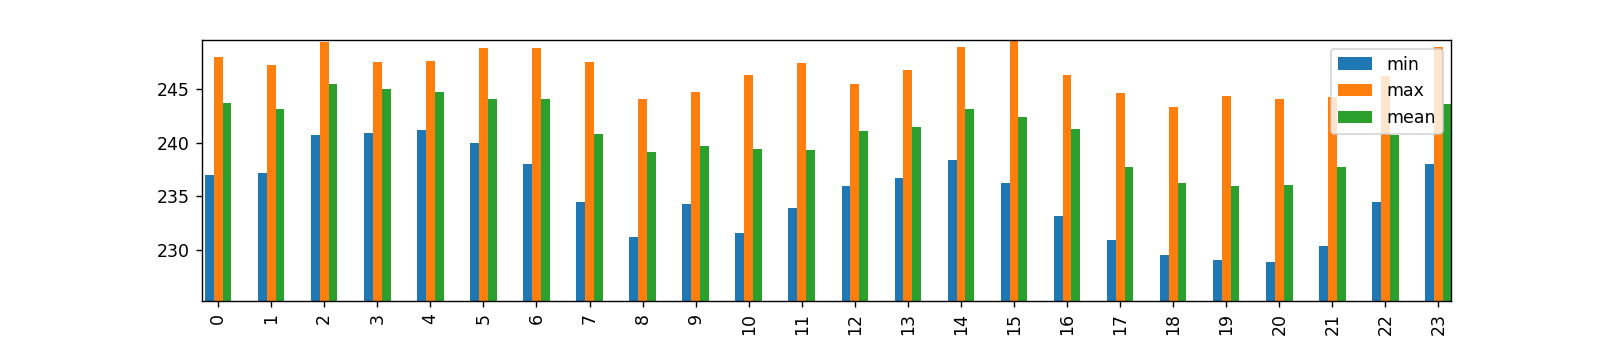

In [10]:
df.groupby(df.index.hour)['Voltage'].agg(['min', 'max', 'mean']).plot.bar()

In [1]:
# write to a CSV it's as easy as this
# df.to_csv('my_first_csv_with_pandas.csv')